In [1]:
%matplotlib inline
import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Desarrollo

## Sets de datos

Nos dieron 6 archivos .csv con datos para analizar:

    - postulantes_educacion = ‘fiuba_1_postulantes_educacion.csv'

    - postulantes_genero_edad = ‘fiuba_2_postulantes_genero_y_edad.csv'

    - vistas = 'fiuba_3_vistas.csv'

    - postulaciones = 'fiuba_4_postulaciones.csv'

    - avisos_online = 'fiuba_5_avisos_online.csv'

    - avisos_detalles = 'fiuba_6_avisos_detalle.csv'

### Empezamos a analizar el primero: ‘postulantes_educacion’

In [2]:
postulantes_educacion = pd.read_csv('/home/luupesado/7506_Datos/2018/datos_navent_fiuba/fiuba_1_postulantes_educacion.csv')

In [3]:
postulantes_educacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298231 entries, 0 to 298230
Data columns (total 3 columns):
idpostulante    298231 non-null object
nombre          298231 non-null object
estado          298231 non-null object
dtypes: object(3)
memory usage: 6.8+ MB


Vemos que es un set de datos completo, es decir que no tiene valores nulos en ninguna de sus columnas.

Comprobamos que no haya ids repetidos:

In [4]:
postulantes_educacion['idpostulante'].value_counts().head()

YlMLGD     9
54MQGz     8
EZD29      8
Ez0LBk9    7
8M21pBL    7
Name: idpostulante, dtype: int64

Vemos que si los hay, por lo que vamos a filtarlos quedandonos que el nivel educativo superior de cada postulante

 Vamos a analizar el nivel educativo de los postulantes.

Qusimos ver la distribucion del nivel educativo de los estudiantes, por lo que utilizamos la columna nombre

In [5]:
postulantes_educacion['nombre'].value_counts()

Secundario           110256
Universitario        104295
Terciario/Técnico     47733
Otro                  24748
Posgrado               7387
Master                 3598
Doctorado               214
Name: nombre, dtype: int64

En este caso hay categorías con tildes, la cual despues traen complicaciones a la hora de graficar con matplotlib que no las soporta, por lo que vamos a cambiarle el nombre.

In [7]:
postulantes_educacion['nombre'] = postulantes_educacion['nombre'].astype('string')

In [8]:
import unicodedata
def elimina_tildes(s):
   return ''.join((c for c in unicodedata.normalize('NFD', s) if unicodedata.category(c) != 'Mn'))

In [9]:
postulantes_educacion['nombre'] = postulantes_educacion['nombre'].apply(lambda x: elimina_tildes(x.decode('utf-8')))

Nos dimos cuenta de que el nivel educativo no depende solo de la columna nombre, sino que tambien depende del estado.

In [10]:
postulantes_educacion['estado'].value_counts()

Graduado      194474
En Curso       78531
Abandonado     25226
Name: estado, dtype: int64

Por lo tanto quisimos crear una columna categórica que incluya a ambos campos

In [11]:
postulantes_educacion['nombre-estado'] = postulantes_educacion['nombre'] + ' - ' + postulantes_educacion['estado']

In [12]:
postulantes_educacion['nombre-estado'] = postulantes_educacion['nombre-estado'].astype('category')

In [13]:
postulantes_educacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298231 entries, 0 to 298230
Data columns (total 4 columns):
idpostulante     298231 non-null object
nombre           298231 non-null object
estado           298231 non-null object
nombre-estado    298231 non-null category
dtypes: category(1), object(3)
memory usage: 7.1+ MB


Ahora queremos que estas categorías tengasn un orden, para que un doctorado sea mayor a un secundario

In [15]:
categories_order = ['Otro - Abandonado',
 'Otro - En Curso',                                        
 'Otro - Graduado', 
'Secundario - Abandonado',
 'Secundario - En Curso',
 'Secundario - Graduado',
 'Terciario/Tecnico - Abandonado',
 'Terciario/Tecnico - En Curso',
 'Terciario/Tecnico - Graduado',
 'Universitario - Abandonado',
 'Universitario - En Curso',
 'Universitario - Graduado',
'Posgrado - Abandonado',
 'Posgrado - En Curso',
 'Posgrado - Graduado',
 'Master - Abandonado',
 'Master - En Curso',
 'Master - Graduado',
'Doctorado - Abandonado',
 'Doctorado - En Curso',
 'Doctorado - Graduado']

In [16]:
postulantes_educacion['nombre-estado'] = postulantes_educacion['nombre-estado'].cat \
                                        .set_categories(categories_order, ordered = True)

Finalmente nos quedamos con el mayor grado de cada uno.

In [17]:
postulantes_educacion = postulantes_educacion.sort_values('nombre-estado', ascending= False).drop_duplicates(subset='idpostulante', keep = 'first')

In [20]:
postulantes_educacion['nombre-estado'].value_counts().sort_index()

Otro - Abandonado                   219
Otro - En Curso                     186
Otro - Graduado                     933
Secundario - Abandonado            2681
Secundario - En Curso              3397
Secundario - Graduado             56333
Terciario/Tecnico - Abandonado     3034
Terciario/Tecnico - En Curso       9730
Terciario/Tecnico - Graduado      14665
Universitario - Abandonado         9895
Universitario - En Curso          46685
Universitario - Graduado          31258
Posgrado - Abandonado               248
Posgrado - En Curso                1730
Posgrado - Graduado                4072
Master - Abandonado                 131
Master - En Curso                  1449
Master - Graduado                  1895
Doctorado - Abandonado               15
Doctorado - En Curso                 91
Doctorado - Graduado                105
Name: nombre-estado, dtype: int64

Vemos que funciono el ordenamiento

Comprobamos que ya no tenemos duplicados

In [21]:
postulantes_educacion['idpostulante'].value_counts().head()

Rz6VOrE    1
bOJLX14    1
96XOwba    1
1QrA4ez    1
5avONz     1
Name: idpostulante, dtype: int64

Ahora, con los datos filtrados, nos fijamos cómo quedó la distrubucion de estados

In [22]:
postulantes_educacion['estado'].value_counts()

Graduado      109261
En Curso       63268
Abandonado     16223
Name: estado, dtype: int64

Lo graficamos así se ve mejor

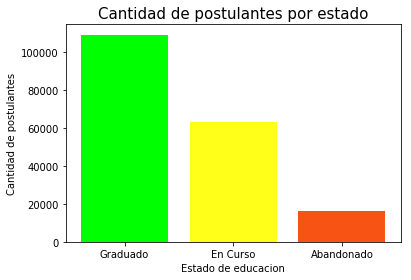

In [34]:
fig, ax = plt.subplots()
ax.bar(np.arange(3), postulantes_educacion['estado'].value_counts(), color = ['#00ff00', '#ffff1a','#f65314'])
ax.set_ylabel('Cantidad de postulantes')
ax.set_xlabel('Estado de educacion')
ax.set_xticks(np.arange(3))
ax.set_xticklabels( postulantes_educacion['estado'].value_counts().index, rotation=0)
ax.set_title('Cantidad de postulantes por estado', size = 15)
    

Agrupamos para ver mejor la informacion

In [36]:
postulantes_nombre = postulantes_educacion.groupby(['estado', 'nombre'])['idpostulante'].count()
postulantes_nombre

estado      nombre           
Abandonado  Doctorado               15
            Master                 131
            Otro                   219
            Posgrado               248
            Secundario            2681
            Terciario/Tecnico     3034
            Universitario         9895
En Curso    Doctorado               91
            Master                1449
            Otro                   186
            Posgrado              1730
            Secundario            3397
            Terciario/Tecnico     9730
            Universitario        46685
Graduado    Doctorado              105
            Master                1895
            Otro                   933
            Posgrado              4072
            Secundario           56333
            Terciario/Tecnico    14665
            Universitario        31258
Name: idpostulante, dtype: int64

Hago un gráfico de los estados, ahora por tipo de educación para que se pueda apreciar mejor.

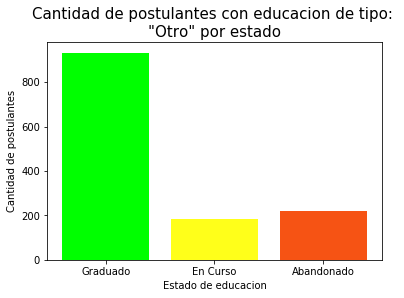

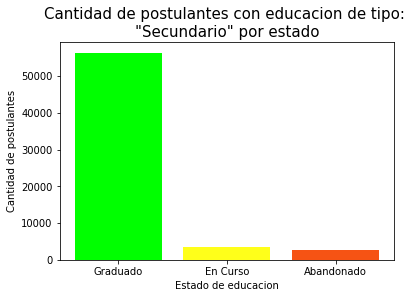

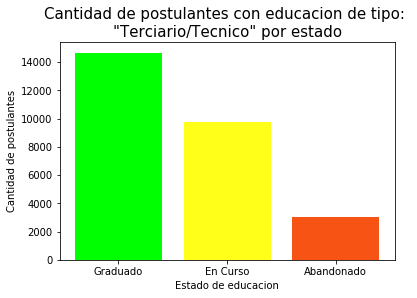

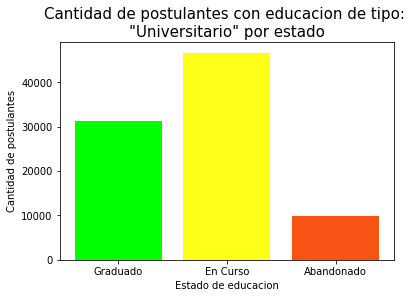

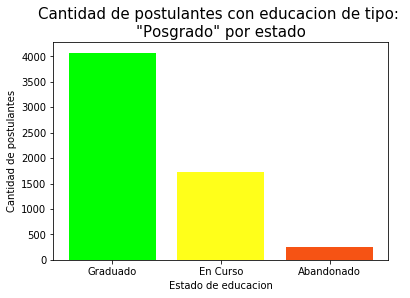

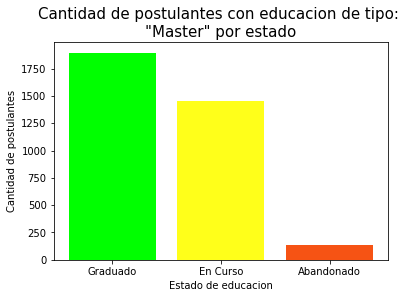

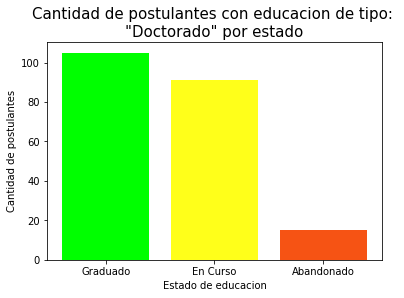

In [43]:
estados = postulantes_educacion['estado'].value_counts().index
nombres = ['Otro', 'Secundario','Terciario/Tecnico','Universitario','Posgrado','Master','Doctorado']

width = 0.35
for nombre in nombres:
    postulantes_estado = []
    fig, ax = plt.subplots()
    for estado in estados:
        postulantes_estado.append(postulantes_nombre[estado][nombre])
    ax.bar(np.arange(3), postulantes_estado, color = ['#00ff00', '#ffff1a','#f65314'])
    ax.set_ylabel('Cantidad de postulantes')
    ax.set_xlabel('Estado de educacion')
    ax.set_xticks(np.arange(3))
    ax.set_xticklabels(estados,rotation=0)
    ax.set_title('Cantidad de postulantes con educacion de tipo: \n"' + nombre + '" por estado', size = 15)
    
    

Vemos que en la mayoría de las categorías las personas ponen, en su mayoría el nivel graduado, con exceptcion de los estudiantes universitarios, donde la mayoría se encuantra "En Curso". 

Son en general pocos, en todos los casos los que usan la categoría abandonado

Ahora hacemos al revés, y para cada estado dibujamos la cantidad de estudiantes en cada tipo de institucion

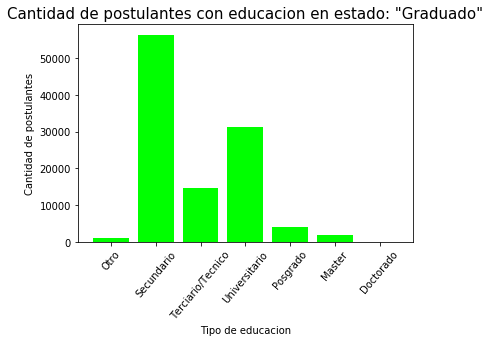

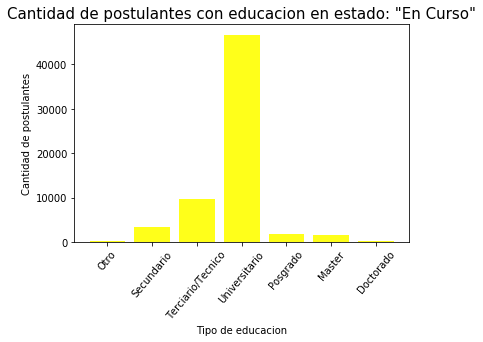

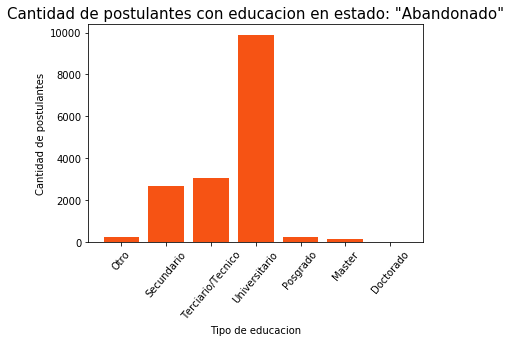

In [45]:
def get_color(unEstado):
    if estado == 'Abandonado': return '#f65314'
    if estado == 'En Curso': return '#ffff1a'
    if estado == 'Graduado': return '#00ff00'

width = 0.35
for estado in estados:
    postulantes_estado = []
    fig, ax = plt.subplots()
    for nombre in nombres:
        postulantes_estado.append(postulantes_nombre[estado][nombre])
    ax.bar(np.arange(len(nombres)), postulantes_estado, color = get_color(estado))
    ax.set_xticks(np.arange(len(nombres)))
    ax.set_xticklabels(nombres,rotation=50)
    ax.set_ylabel('Cantidad de postulantes')
    ax.set_xlabel('Tipo de educacion')
    ax.set_title('Cantidad de postulantes con educacion en estado: "' + estado + '"', size = 15)
    

Vemos que las distribuciones de los estados "En Curso" y "Abandonado" son muy similares, con un gran pico en Universitario (Tambien por la cantidad de casos). Sin embargo, la distribucion de "Graduado" tiene su pico en Secundario.

Para terminar, hacemos un gráfico con un resumen de todo

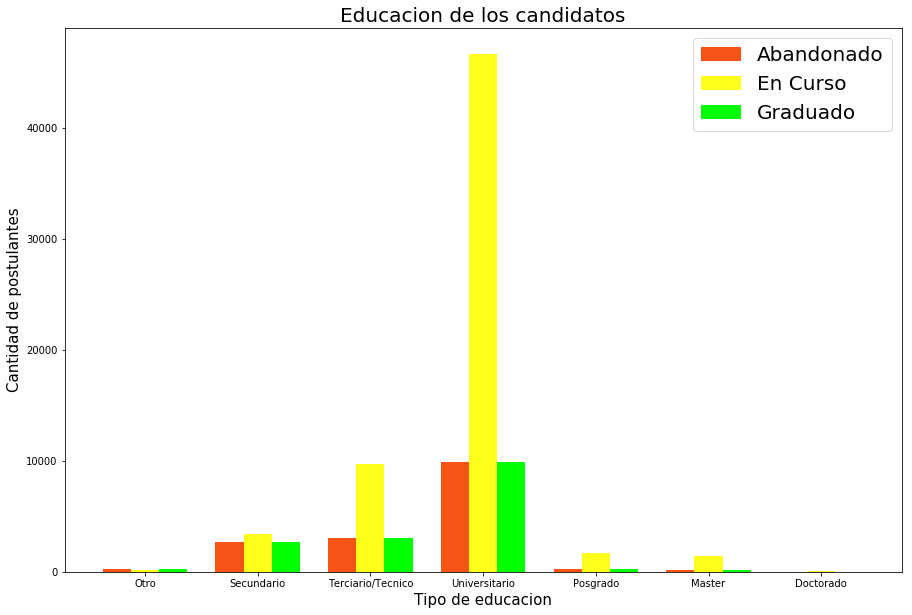

In [55]:
fig, ax = plt.subplots(figsize = (15,10))
width = 0.25

postulantes_abandonado = []
postulantes_encurso = []
postulantes_graduado = []
for nombre in nombres:
    
    postulantes_abandonado.append(postulantes_nombre['Abandonado'][nombre])
    #encurso
    postulantes_encurso.append(postulantes_nombre['En Curso'][nombre])
    #graduado
    postulantes_graduado.append(postulantes_nombre['Graduado'][nombre])

abandonado = ax.bar(np.arange(len(nombres))-width, postulantes_abandonado, width, color = '#f65314')
encurso = ax.bar(np.arange(len(nombres)), postulantes_encurso, width, color = '#ffff1a')
graduado = ax.bar(np.arange(len(nombres))+width, postulantes_abandonado, width, color = '#00ff00')

ax.set_xticks(np.arange(len(nombres)))
ax.set_xticklabels(nombres,rotation=0)

ax.legend((abandonado[0], encurso[0], graduado[0]), ('Abandonado', 'En Curso', 'Graduado'), prop={'size': 20})
ax.set_ylabel('Cantidad de postulantes', size = 15)
ax.set_xlabel('Tipo de educacion', size = 15)
ax.set_title('Educacion de los candidatos', size = 20)